In [2]:


from roboflow import Roboflow
rf = Roboflow(api_key="rG6VaPIg78gemam6hNNG")
project = rf.workspace("classification-zpnqf").project("datasetb-k4x03")
version = project.version(1)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DatasetB-1 in folder:: 100%|██████████| 7738/7738 [00:14<00:00, 550.20it/s] 


TEST PLAN FOR EACH MODULES

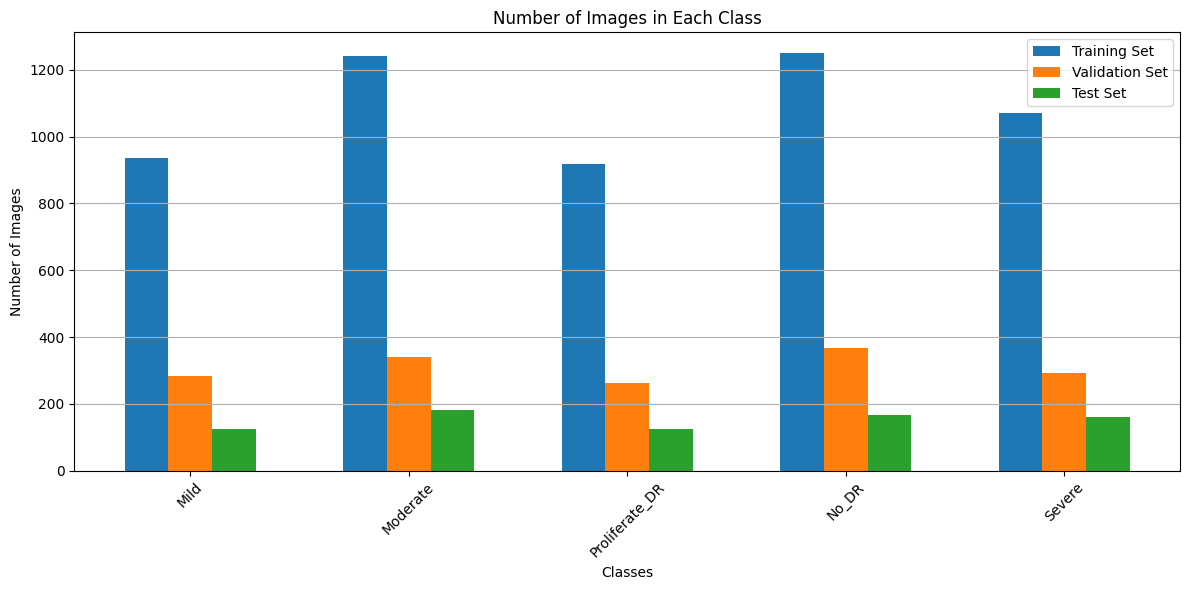

In [ ]:
import os
import matplotlib.pyplot as plt

# Set the directory paths for train, valid, and test sets
train_dir = "/content/DatasetB-1/train"
valid_dir = "/content/DatasetB-1/valid"
test_dir = "/content/DatasetB-1/test"

def count_images(directory):
    class_counts = {}
    # Iterate over each class subdirectory in the dataset
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            # Count the number of images in the class directory
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_name] = num_images
    return class_counts

# Count images in each dataset
train_counts = count_images(train_dir)
valid_counts = count_images(valid_dir)
test_counts = count_images(test_dir)

# Function to plot image counts
def plot_image_counts(train_counts, valid_counts, test_counts):
    classes = list(train_counts.keys())

    train_values = [train_counts[class_name] for class_name in classes]
    valid_values = [valid_counts.get(class_name, 0) for class_name in classes]  # Use 0 if class not in valid set
    test_values = [test_counts.get(class_name, 0) for class_name in classes]    # Use 0 if class not in test set

    x = range(len(classes))

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(x, train_values, width=0.2, label='Training Set', align='center')
    plt.bar([i + 0.2 for i in x], valid_values, width=0.2, label='Validation Set', align='center')
    plt.bar([i + 0.4 for i in x], test_values, width=0.2, label='Test Set', align='center')

    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Class')
    plt.xticks([i + 0.2 for i in x], classes, rotation=45)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plot the image counts
plot_image_counts(train_counts, valid_counts, test_counts)


In [ ]:
import os
from collections import Counter
from torchvision.datasets import ImageFolder

# Dataset paths
train_dir = "/content/DatasetB-1/train"
valid_dir = "/content/DatasetB-1/valid"
test_dir = "/content/DatasetB-1/test"

# Load datasets
train_dataset = ImageFolder(root=train_dir)
valid_dataset = ImageFolder(root=valid_dir)
test_dataset = ImageFolder(root=test_dir)

# Count images in each dataset
train_counts = Counter(label for _, label in train_dataset.samples)
valid_counts = Counter(label for _, label in valid_dataset.samples)
test_counts = Counter(label for _, label in test_dataset.samples)

# Get class names from the dataset
class_names = train_dataset.classes

# Function to print counts with alignment
def print_counts(counts, class_names, dataset_name):
    print(f"\n{dataset_name} Image Counts:")
    total_images = sum(counts.values())
    print(f"{'Stage Name':<30} {'Count':<10}")  # Header
    print('-' * 40)  # Separator
    for class_index, count in counts.items():
        print(f"{class_names[class_index]:<30} {count:<10}")
    print(f"{'Total':<30} {total_images:<10}")  # Total count
    return total_images

# Display counts for each dataset and calculate overall total
total_train_images = print_counts(train_counts, class_names, "Training Set")
total_valid_images = print_counts(valid_counts, class_names, "Validation Set")
total_test_images = print_counts(test_counts, class_names, "Test Set")

# Calculate overall total number of images
overall_total = total_train_images + total_valid_images + total_test_images
print(f"\nOverall Total Images in the Dataset: {overall_total}")



Training Set Image Counts:
Stage Name                     Count     
----------------------------------------
Mild                           937       
Moderate                       1242      
No_DR                          1250      
Proliferate_DR                 919       
Severe                         1070      
Total                          5418      

Validation Set Image Counts:
Stage Name                     Count     
----------------------------------------
Mild                           282       
Moderate                       341       
No_DR                          366       
Proliferate_DR                 261       
Severe                         291       
Total                          1541      

Test Set Image Counts:
Stage Name                     Count     
----------------------------------------
Mild                           124       
Moderate                       181       
No_DR                          168       
Proliferate_DR                 126     

Prediction

Predicted Class: Moderate
Confidence: 91.06%


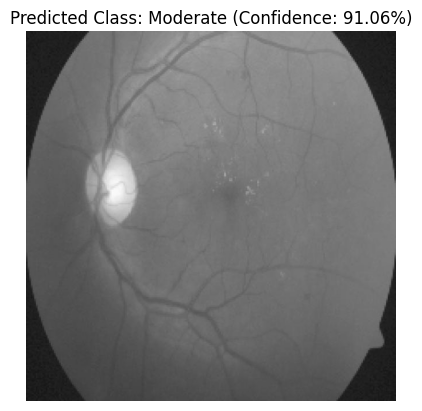

(1, 91.06371998786926)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt

def predict_image(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)

    predicted_class = predicted_class.item()
    confidence_percentage = confidence.item() * 100

    # Print the result
    print(f'Predicted Class: {train_dataset.classes[predicted_class]}')
    print(f'Confidence: {confidence_percentage:.2f}%')

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Predicted Class: {train_dataset.classes[predicted_class]} (Confidence: {confidence_percentage:.2f}%)')
    plt.show()

    return predicted_class, confidence_percentage

# Example usage
image_path = '/content/Mod1.jpg'
predict_image(image_path)


Predicted Class: Mild
Confidence: 98.69%


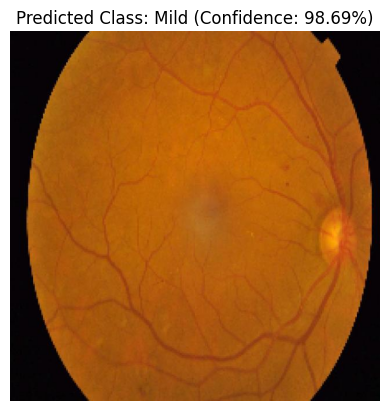

(0, 98.69253635406494)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt

def predict_image(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)

    predicted_class = predicted_class.item()
    confidence_percentage = confidence.item() * 100

    # Print the result
    print(f'Predicted Class: {train_dataset.classes[predicted_class]}')
    print(f'Confidence: {confidence_percentage:.2f}%')

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Predicted Class: {train_dataset.classes[predicted_class]} (Confidence: {confidence_percentage:.2f}%)')
    plt.show()

    return predicted_class, confidence_percentage

# Example usage
image_path = '/content/Mild1.jpg'
predict_image(image_path)


Predicted Class: No_DR
Confidence: 99.41%


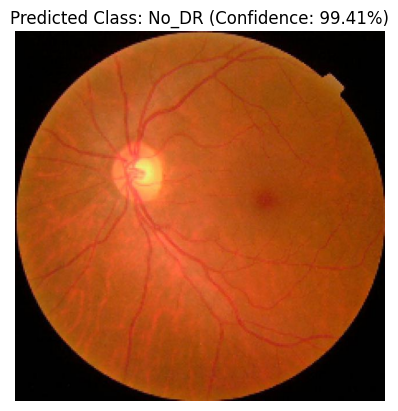

(2, 99.41127896308899)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt

def predict_image(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)

    predicted_class = predicted_class.item()
    confidence_percentage = confidence.item() * 100

    # Print the result
    print(f'Predicted Class: {train_dataset.classes[predicted_class]}')
    print(f'Confidence: {confidence_percentage:.2f}%')

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Predicted Class: {train_dataset.classes[predicted_class]} (Confidence: {confidence_percentage:.2f}%)')
    plt.show()

    return predicted_class, confidence_percentage

# Example usage
image_path = '/content/NO2.jpg'
predict_image(image_path)


Predicted Class: Moderate
Confidence: 89.50%


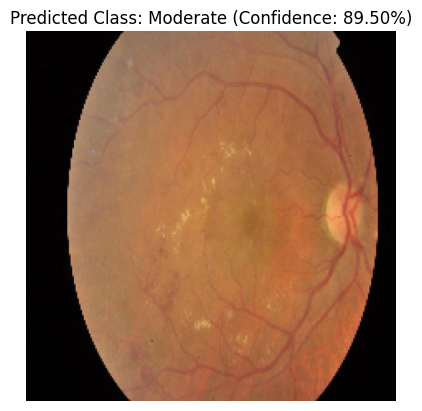

(1, 89.50272798538208)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt

def predict_image(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)

    predicted_class = predicted_class.item()
    confidence_percentage = confidence.item() * 100

    # Print the result
    print(f'Predicted Class: {train_dataset.classes[predicted_class]}')
    print(f'Confidence: {confidence_percentage:.2f}%')

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Predicted Class: {train_dataset.classes[predicted_class]} (Confidence: {confidence_percentage:.2f}%)')
    plt.show()

    return predicted_class, confidence_percentage

# Example usage
image_path = '/content/Mod2.jpg'
predict_image(image_path)


Predicted Class: Proliferate_DR
Confidence: 99.93%


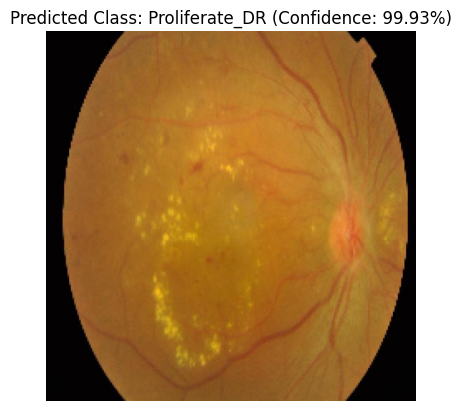

(3, 99.9250590801239)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt

def predict_image(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)

    predicted_class = predicted_class.item()
    confidence_percentage = confidence.item() * 100

    # Print the result
    print(f'Predicted Class: {train_dataset.classes[predicted_class]}')
    print(f'Confidence: {confidence_percentage:.2f}%')

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Predicted Class: {train_dataset.classes[predicted_class]} (Confidence: {confidence_percentage:.2f}%)')
    plt.show()

    return predicted_class, confidence_percentage

# Example usage
image_path = '/content/pro2.jpg'
predict_image(image_path)


Predicted Class: Severe
Confidence: 98.89%


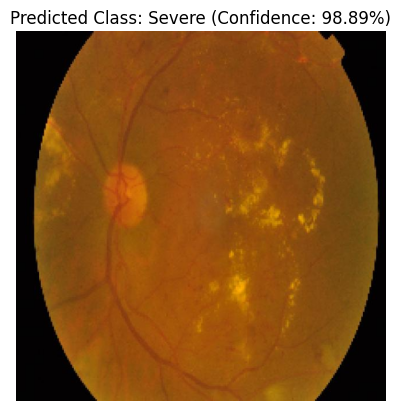

(4, 98.89106750488281)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt

def predict_image(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)

    predicted_class = predicted_class.item()
    confidence_percentage = confidence.item() * 100

    # Print the result
    print(f'Predicted Class: {train_dataset.classes[predicted_class]}')
    print(f'Confidence: {confidence_percentage:.2f}%')

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Predicted Class: {train_dataset.classes[predicted_class]} (Confidence: {confidence_percentage:.2f}%)')
    plt.show()

    return predicted_class, confidence_percentage

# Example usage
image_path = '/content/sev2.jpg'
predict_image(image_path)


MODEL TRAINING

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
This DataLoader will create 4 worke

Epoch [1/25], Train Loss: 1.2071, Train Accuracy: 48.86%, Validation Loss: 0.7865, Validation Accuracy: 70.15%
Epoch [2/25], Train Loss: 0.9962, Train Accuracy: 59.01%, Validation Loss: 0.8045, Validation Accuracy: 67.68%
Epoch [3/25], Train Loss: 0.9208, Train Accuracy: 62.09%, Validation Loss: 0.6856, Validation Accuracy: 72.42%
Epoch [4/25], Train Loss: 0.8826, Train Accuracy: 63.86%, Validation Loss: 0.7048, Validation Accuracy: 71.25%
Epoch [5/25], Train Loss: 0.8437, Train Accuracy: 65.93%, Validation Loss: 0.5670, Validation Accuracy: 76.96%
Epoch [6/25], Train Loss: 0.8152, Train Accuracy: 67.40%, Validation Loss: 0.6519, Validation Accuracy: 73.78%
Epoch [7/25], Train Loss: 0.7740, Train Accuracy: 69.07%, Validation Loss: 0.6539, Validation Accuracy: 75.41%
Epoch [8/25], Train Loss: 0.7482, Train Accuracy: 70.67%, Validation Loss: 0.6023, Validation Accuracy: 76.64%
Epoch [9/25], Train Loss: 0.7125, Train Accuracy: 72.24%, Validation Loss: 0.6216, Validation Accuracy: 78.00%
E

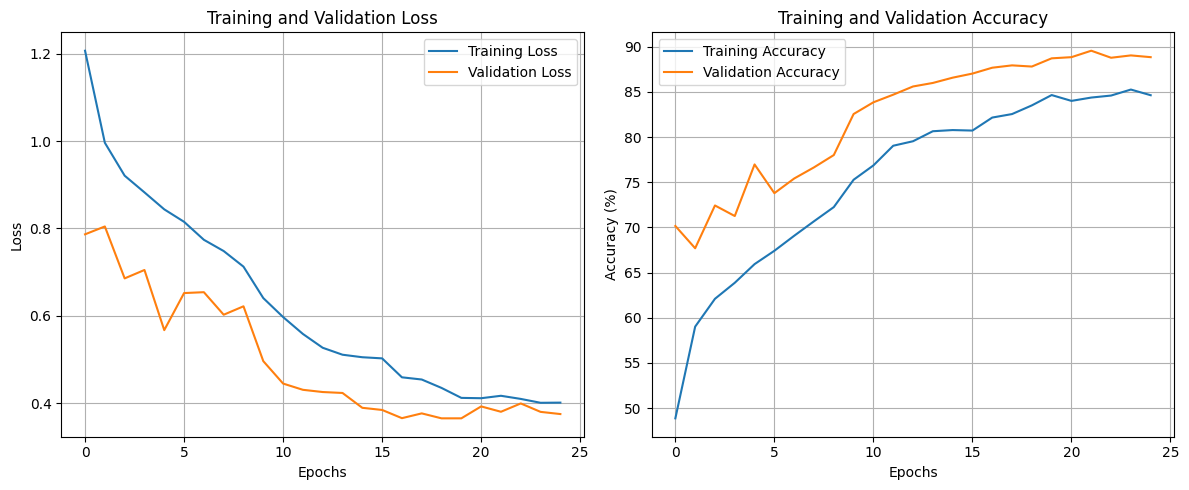

Test Loss: 0.3795, Test Accuracy: 88.67%


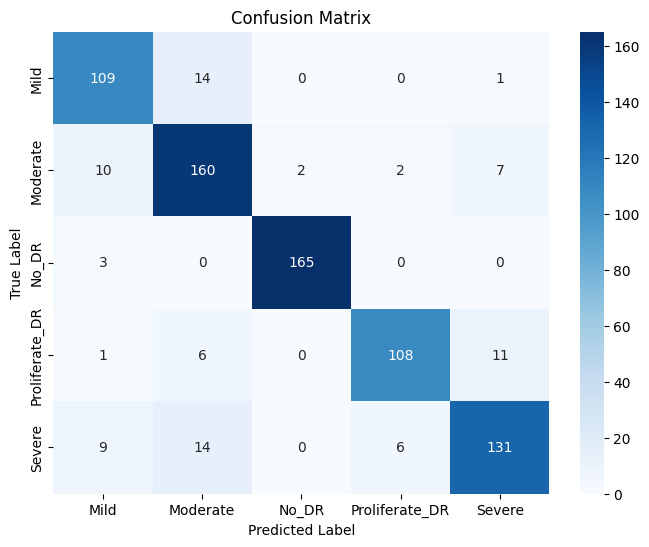

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models
from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset paths
train_dir = "/content/DatasetB-1/train"
valid_dir = "/content/DatasetB-1/valid"
test_dir = "/content/DatasetB-1/test"

# Define transformations with additional augmentations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = ImageFolder(root=train_dir, transform=train_transform)
valid_dataset = ImageFolder(root=valid_dir, transform=test_transform)
test_dataset = ImageFolder(root=test_dir, transform=test_transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Compute class weights for handling class imbalance
labels = [label for _, label in train_dataset.samples]
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define the model (ResNet152)
model = models.resnet152(pretrained=True)

# Modify the last fully connected layer
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, 5)  # 5 output classes for diabetic retinopathy stages
)

# Send model to device (GPU/CPU)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Class-weighted cross-entropy
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # You can experiment with different learning rates

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, verbose=True)

# Mixed precision training
scaler = GradScaler()

# Initialize lists to store loss and accuracy values
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

# Training and validation loop
num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        with autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        # Backward pass
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation step
    model.eval()
    valid_loss = 0.0
    correct_valid = 0
    total_valid = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            with autocast():
                outputs = model(inputs)
                loss = criterion(outputs, labels)

            valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

    valid_accuracy = 100 * correct_valid / total_valid
    valid_losses.append(valid_loss / len(valid_loader))
    valid_accuracies.append(valid_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.2f}%, Validation Loss: {valid_losses[-1]:.4f}, Validation Accuracy: {valid_accuracy:.2f}%')

    # Learning rate scheduler step
    scheduler.step(valid_loss)

# Plotting Training and Validation Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Testing loop and confusion matrix generation
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

test_accuracy = 100 * correct_test / total_test
print(f'Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
